In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import tensorflow as tf
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
import matplotlib.font_manager as fm 

font_fname = 'C:/Windows/Fonts/Malgun.ttf' #적용할 폰트
font_family = fm.FontProperties(fname=font_fname).get_name() #폰트 설정
plt.rcParams["font.family"] = font_family  #폰트 적용

In [3]:
# 부호 오류 고치기 코드
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
os.chdir(r"C:\Users\82109\project\2021 빅데이터 경진대회\최종")

In [6]:
comp_1_one=pd.read_csv('집진기_concattt.csv')

TRAIN_SPLIT = 43118

<AxesSubplot:>

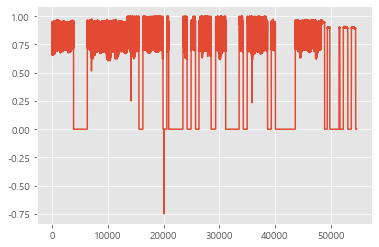

In [7]:
comp_1_one['역률평균'].plot()

In [8]:
comp_1_one.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
comp_1_one['TIMESTAMP'] = pd.to_datetime(comp_1_one['TIME'])
comp_1_one.drop('TIME', axis = 1, inplace=True)
comp_1_one.set_index('TIMESTAMP', inplace=True)

In [10]:
comp_1_one

,전류평균,온도,선간전압평균,상전압평균,유효전력평균,누적전력량,역률평균,주파수,전압고조파평균,무효전력평균
TIMESTAMP,,,,,,,,,,
2020-10-22 00:00:51,20.125000,15.625,397.083344,228.833328,8070.0,7.500423e+04,0.895202,59.928820,7.519531,4017.5
2020-10-22 00:01:51,20.208334,14.375,397.583344,229.083328,8203.0,7.513338e+04,0.902762,59.919483,7.519531,3908.5
2020-10-22 00:02:51,17.916666,15.000,398.166656,229.500000,7885.0,7.526944e+04,0.939593,59.938175,7.324219,-2872.5
2020-10-22 00:03:51,16.406250,15.000,398.083344,229.250000,8184.5,7.540560e+04,0.908000,59.956913,7.779948,3776.5
2020-10-22 00:04:51,15.000000,15.000,398.333344,229.416672,7971.0,7.553964e+04,0.950967,59.891430,7.649740,2592.5
...,...,...,...,...,...,...,...,...,...,...
2020-10-27 23:55:56,0.000000,16.250,379.750000,219.166672,0.0,3.150746e+06,0.000000,59.891440,7.714844,0.0
2020-10-27 23:56:56,0.000000,16.250,380.166656,219.416672,0.0,3.150746e+06,0.000000,59.863403,7.682292,0.0
2020-10-27 23:57:56,0.000000,16.250,382.250000,220.416672,0.0,3.150746e+06,0.000000,59.863422,7.161458,0.0


In [12]:
X = comp_1_one
X_train = comp_1_one[:43118]
X_test = comp_1_one[43118:]
X_train = X_train[['전류평균', '온도', '선간전압평균', '상전압평균','누적전력량','주파수', '전압고조파평균','무효전력평균','역률평균']]
X_test = X_test[['전류평균', '온도', '선간전압평균', '상전압평균','누적전력량','주파수', '전압고조파평균','무효전력평균', '역률평균']]

In [13]:
from sklearn import preprocessing

# preprocessing.MinMaxScaler()
# preprocessing.StandardScaler()
# preprocessing.RobustScaler()
# preprocessing.Normalizer()

# 1. 스케일러를 선택 후 스케일러 객체를 지정한다
scaler = preprocessing.StandardScaler()

# 2. 스케일러 객체의 fit()함수를 이용하여 필요한 파라미터를 저장한다
# scaler_fit에는 칼럼별 최대와 최소값이 저장되어있다.
scaler_fit = scaler.fit(X)

# 3. 스케일러 객체의 transform()함수를 이용하여 스케일링을 수행한다
result=scaler_fit.transform(X)

In [14]:
def feature_engineering_scaling(scaler, X_train, X_test):
    # scaler파라미터는 아래 4개중 하나를 넣는다
    # preprocessing.MinMaxScaler()
    # preprocessing.StandardScaler()
    # preprocessing.RobustScaler()
    # preprocessing.Normalizer()
    scaler = scaler
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                               index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                               index=X_test.index, columns=X_test.columns)
    return X_train_scaling, X_test_scaling

In [15]:
X_train_scaling, X_test_scaling = feature_engineering_scaling(scaler, X_train, X_test)

In [16]:
X_train_scaling = X_train_scaling[['전류평균', '온도', '선간전압평균', '상전압평균','누적전력량','주파수', '전압고조파평균','무효전력평균', '역률평균']]
X_test_scaling = X_test_scaling[['전류평균', '온도', '선간전압평균', '상전압평균','누적전력량','주파수', '전압고조파평균','무효전력평균', '역률평균']]
y_train = X_train_scaling[['역률평균']]
y_test = X_test_scaling[['역률평균']]
X_train = X_train_scaling[['전류평균', '온도', '선간전압평균', '상전압평균','누적전력량','주파수', '전압고조파평균','무효전력평균']]
X_test = X_test_scaling[['전류평균', '온도', '선간전압평균', '상전압평균','누적전력량','주파수', '전압고조파평균','무효전력평균']]

In [17]:
seasonal_lag = 6

for i in X_train_scaling.columns:
    X_train_scaling[i]=X_train_scaling[i].diff(seasonal_lag)
    
for i in X_test_scaling.columns:
    X_test_scaling[i]=X_test_scaling[i].diff(seasonal_lag)

In [18]:
X_train_scaling = X_train_scaling.dropna()
X_test_scaling = X_test_scaling.dropna()

In [19]:
y_train = X_train_scaling[['역률평균']]
y_test = X_test_scaling[['역률평균']]
X_train = X_train_scaling[['전류평균', '온도', '선간전압평균', '상전압평균','누적전력량','주파수', '전압고조파평균','무효전력평균']]
X_test = X_test_scaling[['전류평균', '온도', '선간전압평균', '상전압평균','누적전력량','주파수', '전압고조파평균','무효전력평균']]

In [23]:
X_train_scaling[:43112]

,전류평균,온도,선간전압평균,상전압평균,누적전력량,주파수,전압고조파평균,무효전력평균,역률평균
TIMESTAMP,,,,,,,,,
2020-10-22 00:06:51,0.020633,0.000000,0.315060,0.362799,0.001315,0.305092,0.133144,-1.878809,0.075429
2020-10-22 00:07:51,-0.235997,0.210647,0.378082,0.362799,0.001327,-3.985197,0.029587,-1.884932,0.050182
2020-10-22 00:08:51,0.296608,0.000000,-0.283561,-0.090702,0.001328,-0.710823,0.118350,-0.149544,-0.042435
2020-10-22 00:09:51,0.216653,0.105324,-0.063022,-0.045347,0.001328,-0.406916,-0.014794,-1.728744,0.082705
2020-10-22 00:10:51,0.689935,0.000000,-0.063022,0.000000,0.001331,-1.005201,0.059175,-1.559270,-0.060736
...,...,...,...,...,...,...,...,...,...
2020-11-22 23:55:34,0.000000,-0.105324,0.063010,0.090702,0.000000,-0.203170,-0.088763,0.000000,0.000000
2020-11-22 23:56:34,0.000000,-0.210647,-0.126019,0.000000,0.000000,-0.101237,-0.059175,0.000000,0.000000
2020-11-22 23:57:34,0.000000,0.000000,0.063022,0.090702,0.000000,0.304646,-0.029587,0.000000,0.000000


In [24]:
from pycaret.regression import *

clf = setup(data = X_train_scaling, target = '역률평균', train_size = 0.8, session_id = 6)

,Description,Value
0,session_id,6
1,Target,역률평균
2,Original Data,"(43112, 9)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(34489, 8)"


In [25]:
best5models = compare_models(sort = 'RMSE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0812,0.0328,0.1808,0.6019,0.1110,7.7122,3.9760
catboost,CatBoost Regressor,0.0833,0.0332,0.1822,0.5959,0.1102,10.7480,8.1340
rf,Random Forest Regressor,0.0808,0.0338,0.1836,0.5892,0.1113,8.0421,11.3030
lightgbm,Light Gradient Boosting Machine,0.0827,0.0339,0.1839,0.5884,0.1120,8.9484,0.2250
gbr,Gradient Boosting Regressor,0.0866,0.0345,0.1857,0.5798,0.1159,7.1962,1.8860
xgboost,Extreme Gradient Boosting,0.0828,0.0346,0.1859,0.5787,0.1107,11.6683,1.4970
knn,K Neighbors Regressor,0.1040,0.0529,0.2298,0.3570,0.1282,7.7365,0.1970
lar,Least Angle Regression,0.1322,0.0627,0.2503,0.2386,0.1377,20.9289,0.0280
br,Bayesian Ridge,0.1322,0.0627,0.2503,0.2386,0.1377,20.8649,0.0320
lr,Linear Regression,0.1322,0.0627,0.2503,0.2386,0.1377,20.9289,0.9650


In [26]:
best5models

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=6, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=6, verbose=0, warm_start=False),
 LGBMRegresso

In [27]:
et = create_model('et', fold = 5, cross_validation = True)
cat = create_model('catboost', fold = 5, cross_validation = True)
rf = create_model('rf', fold = 5, cross_validation = True)
lh = create_model('lightgbm', fold = 5, cross_validation = True)
gbr = create_model('gbr', fold = 5, cross_validation = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0869,0.0354,0.1880,0.5642,0.1155,7.0347
1,0.0865,0.0352,0.1875,0.5857,0.1183,6.3322
2,0.0885,0.0354,0.1881,0.5971,0.1148,8.0837
3,0.0849,0.0338,0.1839,0.5871,0.1150,5.4623
4,0.0848,0.0329,0.1813,0.5675,0.1139,7.5863
Mean,0.0863,0.0345,0.1858,0.5803,0.1155,6.8998
SD,0.0014,0.0010,0.0027,0.0125,0.0015,0.9252


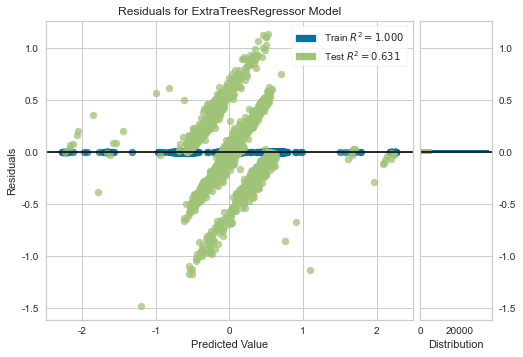

In [28]:
plot_model(et)

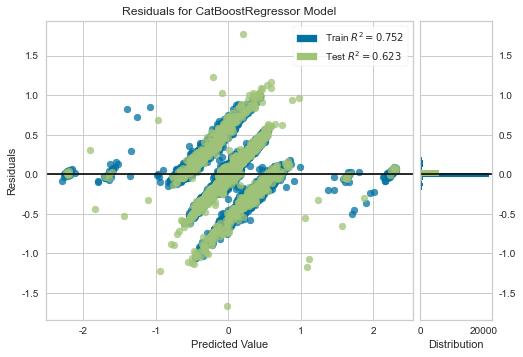

In [29]:
plot_model(cat)

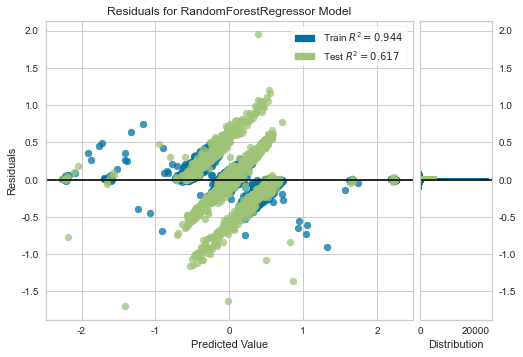

In [30]:
plot_model(rf)

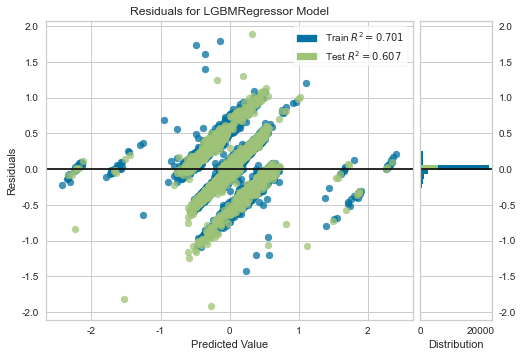

In [31]:
plot_model(lh)

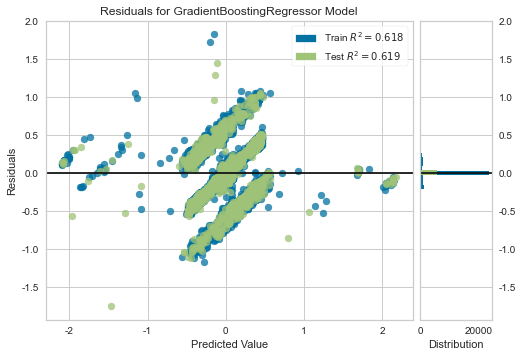

In [32]:
plot_model(gbr)

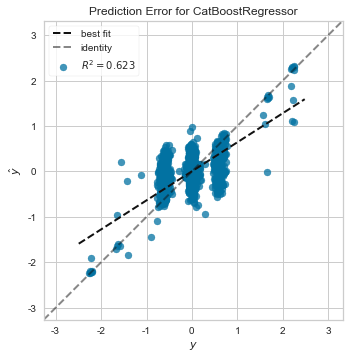

In [33]:
plot_model(cat, plot='error')

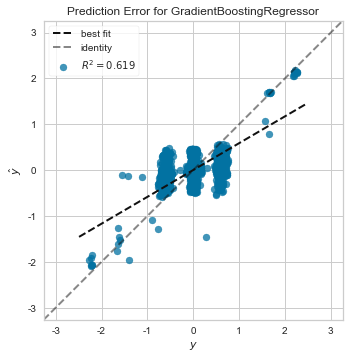

In [34]:
plot_model(gbr, plot='error')

In [35]:
final_model = finalize_model(cat)
pred = predict_model(final_model, data = X_test)

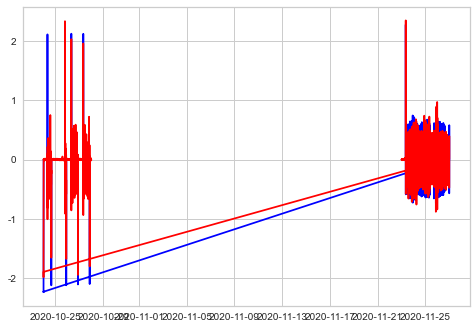

In [36]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')

In [37]:
final_model = finalize_model(gbr)
pred = predict_model(final_model, data = X_test)

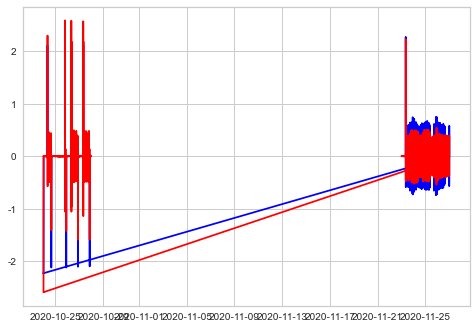

In [38]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')

In [39]:
# 모델 블렌딩

blender_specific = blend_models(estimator_list = [cat,lh,gbr], optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0811,0.0305,0.1748,0.6123,0.1115,8.6022
1,0.0856,0.0359,0.1896,0.5695,0.1115,7.2268
2,0.0814,0.0328,0.1811,0.6198,0.1091,10.1952
3,0.0848,0.0340,0.1844,0.5928,0.1157,6.8685
4,0.0868,0.0340,0.1844,0.6352,0.1111,10.8566
5,0.0837,0.0324,0.1799,0.6066,0.1131,6.6157
6,0.0847,0.0333,0.1824,0.5993,0.1123,6.8011
7,0.0769,0.0292,0.1709,0.6388,0.1035,6.9453
8,0.0816,0.0310,0.1762,0.5911,0.1100,11.6265
9,0.0822,0.0313,0.1770,0.5877,0.1125,5.8411


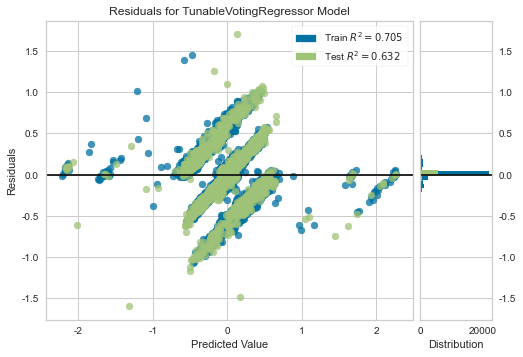

In [40]:
plot_model(blender_specific)

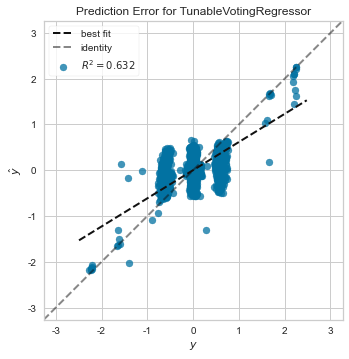

In [41]:
plot_model(blender_specific, plot='error')

In [42]:
final_model = finalize_model(blender_specific)
pred = predict_model(final_model, data = X_test)

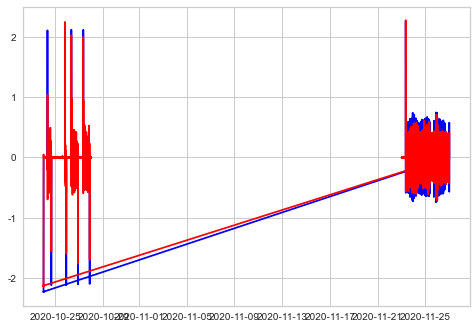

In [43]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')